To do:

- Correlation heatmap

- Biblioteca que dei star no github para otimização (testar para diferentes normalizações e etc)

- Scalers: standard, robust, etc.

- Ver notebook de pipeline do Kaggle



Ideas:
- Memory function/class (https://www.kaggle.com/code/bannourchaker/credit-part1-dataunderstanding/notebook#Reduce-Memory:)
- Different scaler and imputation for different methods
- Huge pipeline containing everything, so that we can compare each imputation with each model and each scaler and so on
- Voting ensemble as given in the following code
- Super learner
- Dimensionality reduction

In [1]:
import warnings
from sklearn.exceptions import DataConversionWarning

# Suprimir o aviso de DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.simplefilter(action='ignore', category=FutureWarning)

warnings.resetwarnings()

In [2]:
# estimators = [('LR',model1), ('KNN',model2), ('SVC',model3),
#               ('DT',model4), ('ADa',model5), ('GB',model6),
#               ('NB',model7), ('RF',model8),  ('ET',model9)]

# kfold = StratifiedKFold(n_splits=10, random_state=SEED)
# ensemble = VotingClassifier(estimators)
# results = cross_val_score(ensemble, X_train,Y_train, cv=kfold)
# print('Accuracy on train: ',results.mean())
# ensemble_model = ensemble.fit(X_train,Y_train)
# pred = ensemble_model.predict(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds, random_state=SEED)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 



models = GetScaledModel('standard')
names,results = BasedLine2(X_train, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

In [1]:
# # This Python 3 environment comes with many helpful analytics libraries installed
# # It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# # For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#!pip install xlrd

In [3]:
# Kaggle code:

# pd.set_option('display.max_colwidth', None)
# data_dict = pd.read_excel('/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls')
# data_dict

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

2023-08-22 15:04:57,900 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":

2023-08-22 15:04:57,915 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)



In [3]:
pd.set_option('display.max_colwidth', None)
data_dict = pd.read_excel('input/Data Dictionary.xls')
data_dict

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquency or worse,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or more past due.,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans including home equity lines of credit,integer


In [5]:
train = pd.read_csv('input/cs-training.csv')
test = pd.read_csv('input/cs-test.csv')
train.head(10)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


# Memory reduction

In [6]:
###############################################################################
#                         Reduce Memory                                       #
###############################################################################

# Author : https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        name =df[col].dtype.name 
        
        if col_type != object and col_type.name != 'category':
        #if name != "category":    
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


train = reduce_mem_usage(train)

Memory usage of dataframe is 13.73 MB
Memory usage after optimization is: 3.29 MB
Decreased by 76.0%


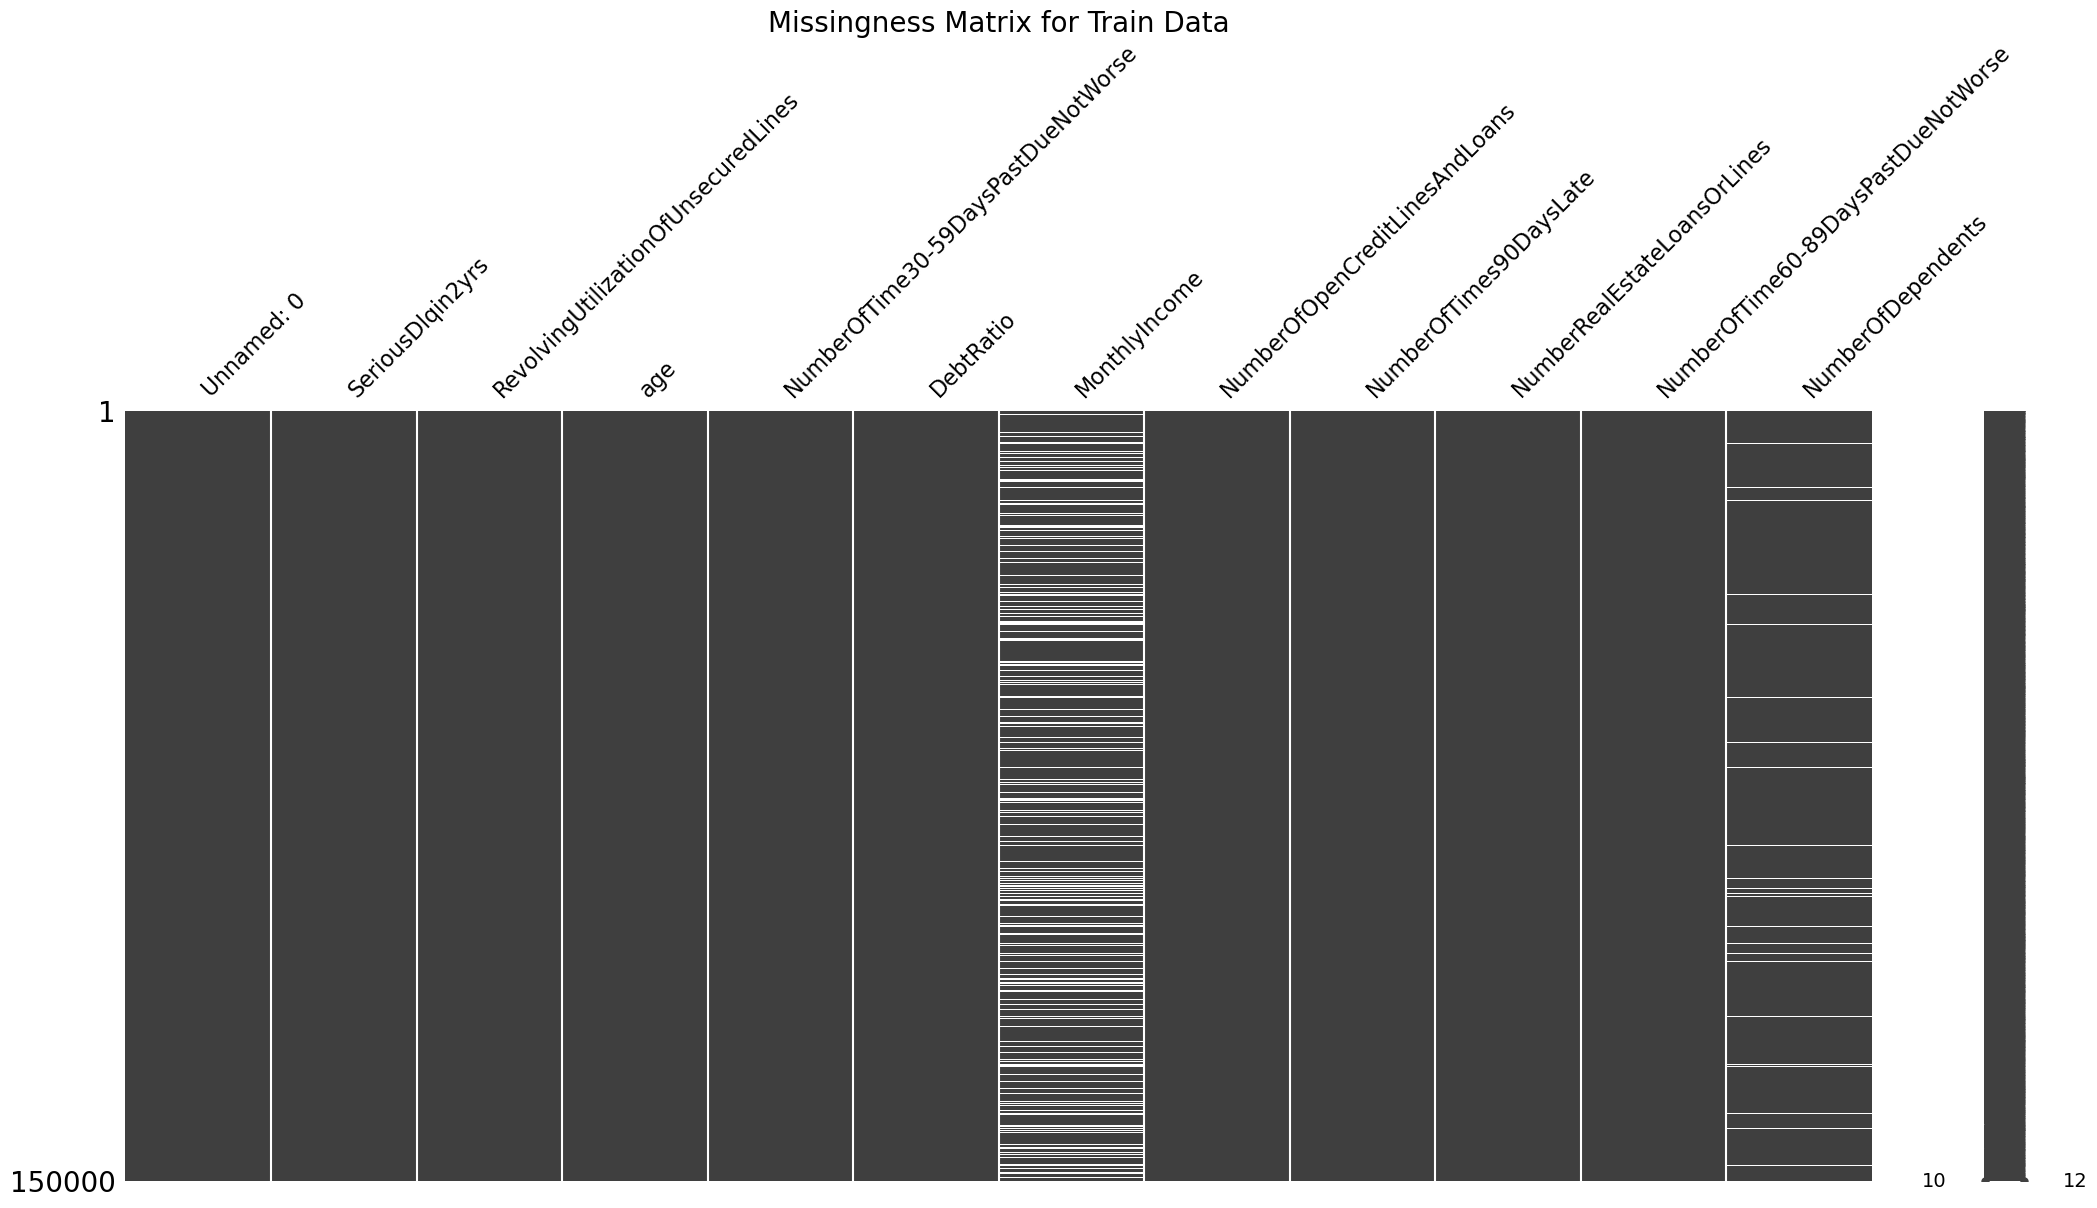

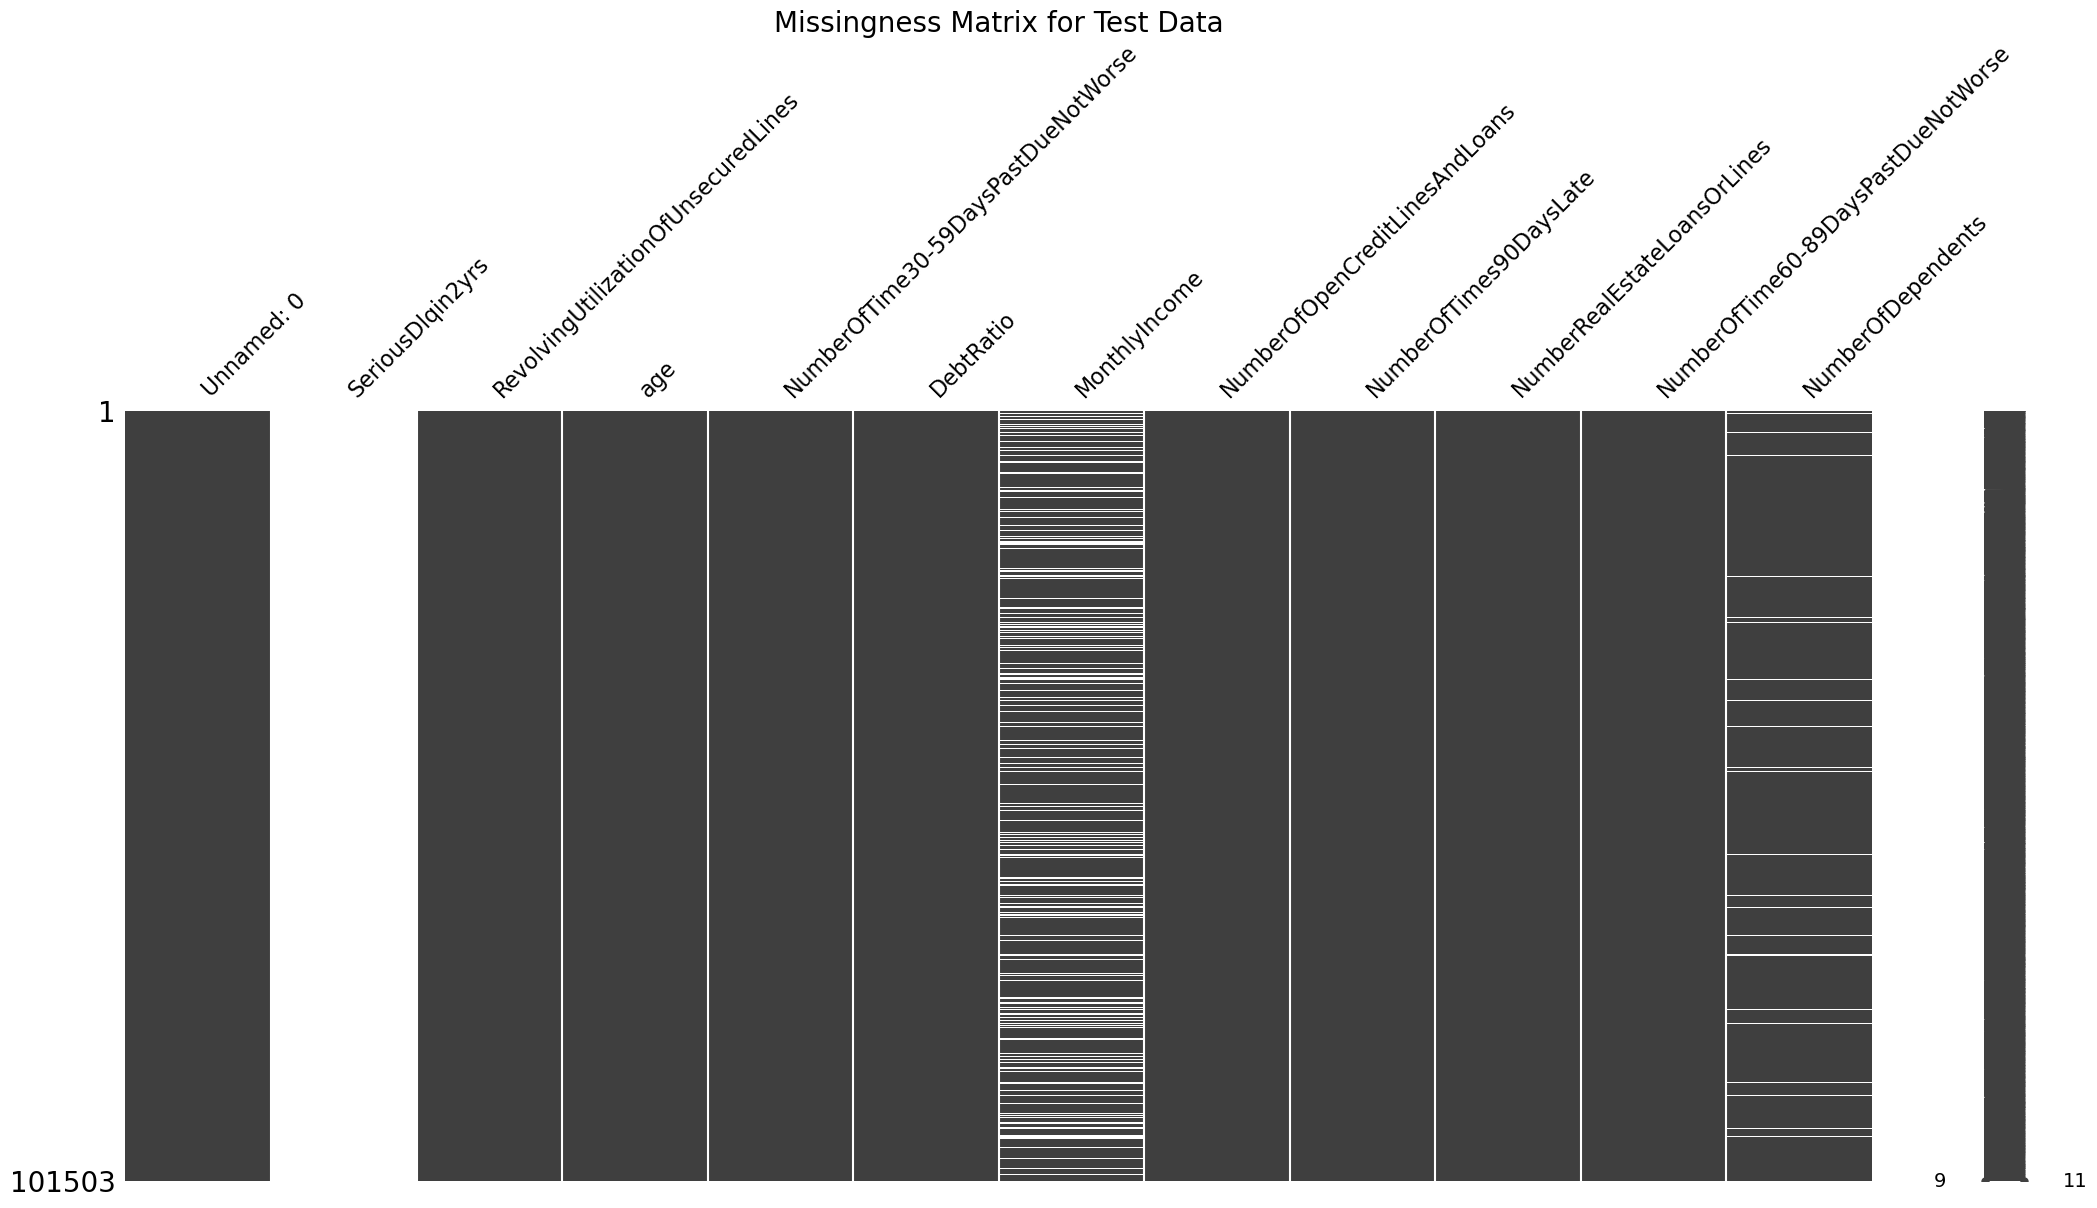

In [7]:
import missingno as msno
msno.matrix(train)
title_font = {'size': 20}  # Adjust the font size as needed
plt.title("Missingness Matrix for Train Data", fontdict=title_font)
plt.show()

msno.matrix(test)
title_font = {'size': 20}  # Adjust the font size as needed
plt.title("Missingness Matrix for Test Data", fontdict=title_font)
plt.show()


Looks like MonthlyIncome has a lot of NaN and i'm not sure why. I will try different methods of imputation later on the Modeling phase

In [8]:
print(f"Percentage of NaN - Monthly Income: {train.loc[train['MonthlyIncome'].isnull()].shape[0]/train.shape[0]}")

print(f"Percentage of NaN - Number of dependents: {train.loc[train['NumberOfDependents'].isnull()].shape[0]/train.shape[0]}")

Percentage of NaN - Monthly Income: 0.19820666666666667
Percentage of NaN - Number of dependents: 0.02616


# Data Cleaning

In [9]:
import seaborn as sns

train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.0
mean,75000.500000,0.066840,NaN,52.295207,0.421033,352.825867,6.670017e+03,8.452760,0.265973,1.018240,0.240387,NaN
std,43301.414527,0.249746,NaN,14.771866,4.192781,2038.782471,1.438386e+04,5.145951,4.169304,1.129771,4.155179,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0
25%,37500.750000,0.000000,0.029861,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.0
50%,75000.500000,0.000000,0.154175,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.0
75%,112500.250000,0.000000,0.559082,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.0
max,150000.000000,1.000000,50720.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.0


## Unnamed: 0

In [10]:
train['Unnamed: 0'].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Unnamed: 0, dtype: int32

It's just an id column, which is useless for us

In [11]:
train.drop('Unnamed: 0', axis=1, inplace=True)

## Age

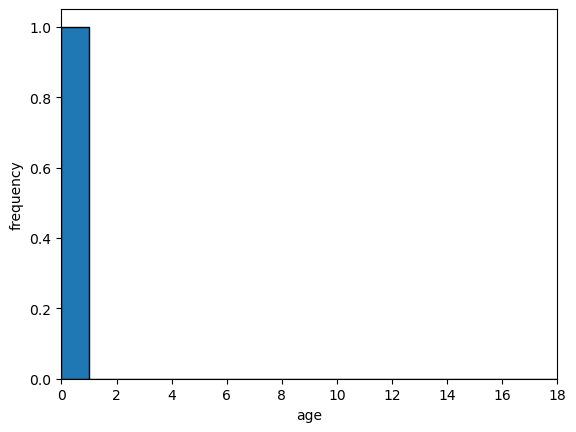

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ages = train['age']

bins = np.linspace(0, 18, 19)

plt.hist(ages, bins=bins, edgecolor='black')
plt.xlabel('age')
plt.ylabel('frequency')
plt.xlim(0, 18)
plt.show()

In [13]:
print(test['age'].describe())
print('\n\n',test[test['age'] != 0]['age'].describe())

count    101503.000000
mean         52.405436
std          14.779756
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         104.000000
Name: age, dtype: float64


 count    101503.000000
mean         52.405436
std          14.779756
min          21.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         104.000000
Name: age, dtype: float64


Looks like the min age is 21 but the max age is unsure. So, that only 0 is an outlier, which i decided to imput as mean, since the age is not that skewed

In [14]:
# Imputing mean since data is not that skewed (age == 0 only happened once)
train.loc[train['age'] == 0,'age'] = train['age'].mean()

Evaluating multicolinearity with correlation heatmap

# Features selection

## Evaluating multicolinearity

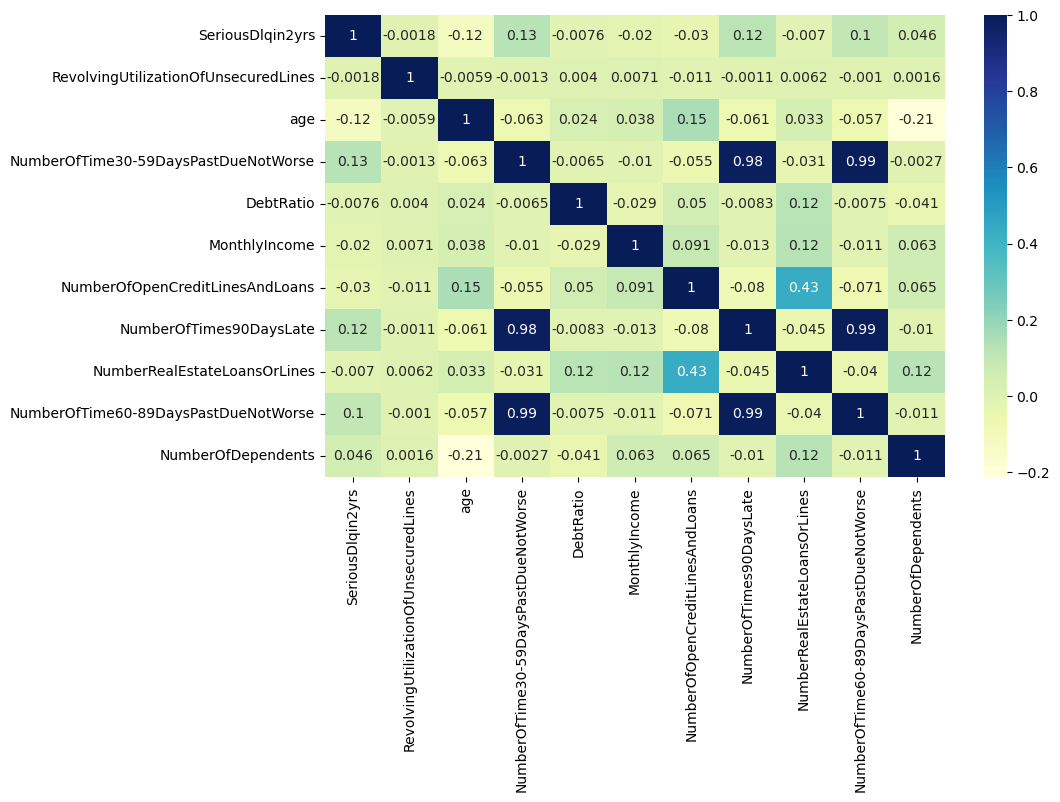

In [15]:
plt.figure(figsize=(10, 6))
# plotting correlation heatmap
dataplot = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

# displaying heatmap
plt.show()

Looks like we have three pairs of variables that will result in the multicolinearity problem. Let's explicitly get the pairs. I plan on removing one of the variables of the pairs that has over 0.7

In [16]:
correlation_matrix = train.corr()


multicolinearity_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            multicolinearity_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j]))


print('High correlation pairs:\n')            
for pair in multicolinearity_pairs:
    print(pair)

High correlation pairs:

('NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTimes90DaysLate')
('NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse')
('NumberOfTimes90DaysLate', 'NumberOfTime60-89DaysPastDueNotWorse')


I will only choose what variables will be removed after training a model and seeing the importances, even though i will probably maintain 30-59 Days since it's more related to the target

# Modeling

In [17]:
from pandas import set_option

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

## Feature and target columns selection

For now i'll use every column except Unnamed: 0 in order to build the dumb and baseline model

In [18]:
feature_columns = train.drop('SeriousDlqin2yrs',axis=1).columns

In [19]:
target_column = ['SeriousDlqin2yrs']

## Imputation (selection and optimization)

Before doing baseline modeling, we have to impute the data

I first tried every imputation algorithm in sklearn and, with the accuracy, selected the best imputation (IterativeImputer). Then i did some grid search to optimize the hyperparameters

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train[feature_columns], train[target_column],
                                                    random_state=18)

## Dumb model

Dumb model: Predicting that the target will be the most frequent value

In [21]:
from sklearn.metrics import accuracy_score


most_frequent_class = y_train.value_counts().idxmax()

dumb_predictions = [most_frequent_class] * len(X_test)

# Calculate accuracy
dumb_accuracy = accuracy_score(y_test, dumb_predictions)

print(f'Dumb Model Accuracy: {dumb_accuracy}')

Dumb Model Accuracy: 0.9361866666666666


In [22]:
len(X_train.columns), len(y_train.columns), len(X_test.columns), len(y_test.columns)

(10, 1, 10, 1)

In [23]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



#imputer_list = ['iterative','median', 'mean', 'most_frequent', 'KNN']
imputer_list = ['iterative']
params = best_params = {
    'max_iter': 15,
    'n_nearest_features': 10,
    'random_state': 18
}
for imputer in imputer_list:
    if imputer == 'KNN':
        imp = KNNImputer(n_neighbors=5)
    elif imputer == 'iterative':
        imp = IterativeImputer()
    elif imputer == 'missing':
        imp = MissingIndicator()
    else:
        imp = SimpleImputer(strategy=imputer)
    
    train_imputed = pd.DataFrame(imp.fit_transform(X_train), columns=feature_columns)
    test_imputed = pd.DataFrame(imp.transform(X_test), columns=feature_columns)
    
    model = RandomForestClassifier()
    model.fit(train_imputed, y_train)
    
    predictions = model.predict(test_imputed)
    accuracy = accuracy_score(y_test, predictions)
    
    print(f'Accuracy for {imputer}: {accuracy}')

2023-08-22 15:16:20,698 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\AppData\Local\Temp\ipykernel_3356\3717262928.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train_imputed, y_train)



Accuracy for iterative: 0.9373333333333334


The iterative imputer gave the best accuracy. Performing a grid search:

In [71]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Assuming you have defined feature_columns and target_column elsewhere

param_grid = {
    'imputer__max_iter': [15],
    'imputer__random_state': [18],
    'imputer__n_nearest_features': [7,10,12],
    'verbose': [2]
}

# param_grid = {
#     'imputer__n_nearest_features': [3],
#     'imputer__max_iter': [50],
#     'imputer__random_state': [42]
# }

pipeline = Pipeline([
    ('imputer', IterativeImputer()),
    ('classifier', RandomForestClassifier())
])

X_train, X_test, y_train, y_test = train_test_split(train[feature_columns], train[target_column], random_state=18)

y_train = y_train[target_column].values.ravel()
y_test = y_test[target_column].values.ravel()
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)



best_pipeline = grid_search.best_estimator_
predictions = best_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)

print(f'Best Imputer parameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy}')

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[Pipeline] ........... (step 1 of 2) Processing imputer, total=   1.4s
[Pipeline] ........ (step 2 of 2) Processing classifier, total=  23.7s
Best Imputer parameters: {'imputer__max_iter': 15, 'imputer__n_nearest_features': 10, 'imputer__random_state': 18, 'verbose': 2}
Accuracy: 0.93752


## Baseline model

As seen before, the baseline accuracy is 0.93744

In [30]:
model = RandomForestClassifier()

model.fit(train_imputed, y_train)
predictions = model.predict(test_imputed)
accuracy = accuracy_score(y_test, predictions)

print('Accuracy score: ', accuracy)

Accuracy score:  0.9373066666666666


## Scaling numerical features

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_features = (train.select_dtypes(include=numerics)).columns

scaler_list = ['StandardScaler', 'MinMaxScaler', 'RobustScaler']

for scaler_name in scaler_list:
    if scaler_name == 'StandardScaler':
        scaler = StandardScaler()
    elif scaler_name == 'MinMaxScaler':
        scaler = MinMaxScaler()
    elif scaler_name == 'RobustScaler':
        scaler = RobustScaler()

    # Select only numerical features for scaling
    train_scaled = scaler.fit_transform(train_imputed)
    test_scaled = scaler.transform(test_imputed)

    model = KNeighborsClassifier()  # Use KNeighborsClassifier instead of GradientBoostingClassifier
    model.fit(train_scaled, y_train)

    predictions = model.predict(test_scaled)
    scores = cross_val_score(model, train_scaled, y_train, cv=5, scoring='accuracy')
    
    print(f'Cross-validation accuracy scores for {scaler_name}: {scores}')
    print(f'Mean accuracy for {scaler_name}: {np.mean(scores)}')
    print('\n')

    print(f'Accuracy for {scaler_name}: {accuracy}')

2023-08-18 12:10:36,490 [13488] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guief\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)

2023-08-18 12:10:49,774 [13488] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guief\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)

2023-08-18 12:10:56,598 [13488] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guief\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r

Cross-validation accuracy scores for StandardScaler: [0.93195556 0.93262222 0.93057778 0.93106667 0.92991111]
Mean accuracy for StandardScaler: 0.9312266666666666


Accuracy for StandardScaler: 0.93464


2023-08-18 12:11:31,086 [13488] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guief\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)

2023-08-18 12:11:34,833 [13488] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guief\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)

2023-08-18 12:11:39,035 [13488] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guief\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r

Cross-validation accuracy scores for MinMaxScaler: [0.93231111 0.932      0.93217778 0.9324     0.93151111]
Mean accuracy for MinMaxScaler: 0.93208


Accuracy for MinMaxScaler: 0.93464


2023-08-18 12:12:00,262 [13488] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guief\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)

2023-08-18 12:12:04,831 [13488] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guief\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)

2023-08-18 12:12:09,422 [13488] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guief\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r

Cross-validation accuracy scores for RobustScaler: [0.93137778 0.93244444 0.93017778 0.93044444 0.93102222]
Mean accuracy for RobustScaler: 0.9310933333333333


Accuracy for RobustScaler: 0.93464


Min-max seem to work better. Of course we could try specific methods for different columns, but i won't bother that much

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


def BasedLine2(X_train, y_train,models):
    # Test options and evaluation metric
    num_folds = 10
    scoring = 'accuracy'

    results = []
    names = []
    for name, model in models:
        kfold = StratifiedKFold(n_splits=num_folds)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
        
    return names, results

def GetScaledModel(nameOfScaler):
    
    if nameOfScaler == 'standard':
        scaler = StandardScaler()
    elif nameOfScaler =='minmax':
        scaler = MinMaxScaler()
    elif nameOfScaler == 'robust':
        scaler = RobustScaler()

    pipelines = []
    pipelines.append((nameOfScaler+'LR'  , Pipeline([('Scaler', scaler),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfScaler+'LDA' , Pipeline([('Scaler', scaler),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfScaler+'KNN' , Pipeline([('Scaler', scaler),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfScaler+'CART', Pipeline([('Scaler', scaler),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfScaler+'NB'  , Pipeline([('Scaler', scaler),('NB'  , GaussianNB())])))
    #pipelines.append((nameOfScaler+'SVM' , Pipeline([('Scaler', scaler),('SVM' , SVC())])))
    pipelines.append((nameOfScaler+'AB'  , Pipeline([('Scaler', scaler),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfScaler+'GBM' , Pipeline([('Scaler', scaler),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfScaler+'RF'  , Pipeline([('Scaler', scaler),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfScaler+'ET'  , Pipeline([('Scaler', scaler),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 

In [31]:

models = GetScaledModel('standard')
names,results = BasedLine2(train_imputed, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

standardLR: 0.933049 (0.000592)
standardLDA: 0.933040 (0.001120)


2023-08-21 15:16:24,176 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)

2023-08-21 15:16:29,489 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the 

standardKNN: 0.931547 (0.001182)
standardCART: 0.897227 (0.002509)
standardNB: 0.931324 (0.000404)
standardAB: 0.934818 (0.001078)
standardGBM: 0.936338 (0.001516)
standardRF: 0.934293 (0.001210)
standardET: 0.932524 (0.001643)


NameError: name 'PlotBoxR' is not defined

In [37]:
def ScoreDataFrame(names,results):
    def floatingDecimals(f_val, dec=3):
        prc = "{:."+str(dec)+"f}" 
    
        return float(prc.format(f_val))

    scores = []
    for r in results:
        scores.append(floatingDecimals(r.mean(),4))

    scoreDataFrame = pd.DataFrame({'Model':names, 'Score': scores})
    return scoreDataFrame

In [40]:
basedLineScore = ScoreDataFrame(names,results)
basedLineScore.sort_values('Score',ascending=False)

,Model,Score
6,standardGBM,0.9363
5,standardAB,0.9348
7,standardRF,0.9343
0,standardLR,0.9330
1,standardLDA,0.9330
8,standardET,0.9325
2,standardKNN,0.9315
4,standardNB,0.9313
3,standardCART,0.8972


In [39]:
import plotly.graph_objs as go
import plotly.offline as py
class PlotBoxR(object):
    
    
    def __Trace(self,nameOfFeature,value): 
    
        trace = go.Box(
            y=value,
            name = nameOfFeature,
            marker = dict(
                color = 'rgb(0, 128, 128)',
            )
        )
        return trace

    def PlotResult(self,names,results):
        
        data = []

        for i in range(len(names)):
            data.append(self.__Trace(names[i],results[i]))


        py.iplot(data)
        
        
        
PlotBoxR().PlotResult(names,results)
scaledScoreStandard = ScoreDataFrame(names,results)
compareModels = pd.concat([basedLineScore,
                           scaledScoreStandard], axis=1)
compareModels

,Model,Score,Model,Score
0,standardLR,0.9330,standardLR,0.9330
1,standardLDA,0.9330,standardLDA,0.9330
2,standardKNN,0.9315,standardKNN,0.9315
3,standardCART,0.8972,standardCART,0.8972
4,standardNB,0.9313,standardNB,0.9313
5,standardAB,0.9348,standardAB,0.9348
6,standardGBM,0.9363,standardGBM,0.9363
7,standardRF,0.9343,standardRF,0.9343
8,standardET,0.9325,standardET,0.9325


standardLR: 0.933049 (0.000592)
standardLDA: 0.933040 (0.001120)
standardKNN: 0.931547 (0.001182)
standardCART: 0.897227 (0.002509)
standardNB: 0.931324 (0.000404)
standardAB: 0.934818 (0.001078)
standardGBM: 0.936338 (0.001516)
standardRF: 0.934293 (0.001210)
standardET: 0.932524 (0.001643)

### Minmax

In [67]:
compareModels = pd.concat([basedLineScore,
                           scaledScoreRobust], axis=0,ignore_index=True)

In [70]:
scaledScoreMax

,Model,Score
0,minmaxLR,0.9324
1,minmaxLDA,0.9330
2,minmaxKNN,0.9323
3,minmaxCART,0.8946
4,minmaxNB,0.9313
5,minmaxAB,0.9346
6,minmaxGBM,0.9361
7,minmaxRF,0.9346
8,minmaxET,0.9325


In [69]:
compareModels

,Model,Score
0,standardLR,0.9330
1,standardLDA,0.9330
2,standardKNN,0.9315
3,standardCART,0.8972
4,standardNB,0.9313
5,standardAB,0.9348
6,standardGBM,0.9363
7,standardRF,0.9343
8,standardET,0.9325
9,robustLR,0.9322


In [42]:
models = GetScaledModel('minmax')
names,results = BasedLine2(train_imputed, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreMax = ScoreDataFrame(names,results)
compareModels = pd.concat([compareModels, scaledScoreMax], ignore_index=True)
compareModels

minmaxLR: 0.932382 (0.000400)
minmaxLDA: 0.933040 (0.001120)


2023-08-21 15:34:14,643 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


2023-08-21 15:34:17,891 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False,

minmaxKNN: 0.932347 (0.000577)
minmaxCART: 0.894604 (0.001842)
minmaxNB: 0.931324 (0.000404)
minmaxAB: 0.934569 (0.001480)
minmaxGBM: 0.936107 (0.001577)
minmaxRF: 0.934622 (0.001607)
minmaxET: 0.932471 (0.001548)


,Model,Score,Model,Score
0,standardLR,0.9330,minmaxLR,0.9324
1,standardLDA,0.9330,minmaxLDA,0.9330
2,standardKNN,0.9315,minmaxKNN,0.9323
3,standardCART,0.8972,minmaxCART,0.8946
4,standardNB,0.9313,minmaxNB,0.9313
5,standardAB,0.9348,minmaxAB,0.9346
6,standardGBM,0.9363,minmaxGBM,0.9361
7,standardRF,0.9343,minmaxRF,0.9346
8,standardET,0.9325,minmaxET,0.9325


In [46]:
models = GetScaledModel('robust')
names,results = BasedLine2(train_imputed, y_train,models)
PlotBoxR().PlotResult(names,results)
scaledScoreRobust = ScoreDataFrame(names,results)
compareModels = pd.concat([compareModels, scaledScoreRobust], ignore_index=True)
compareModels

2023-08-21 15:59:17,525 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


2023-08-21 15:59:19,099 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the 

robustLR: 0.932213 (0.000321)
robustLDA: 0.933040 (0.001120)


2023-08-21 15:59:36,233 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


2023-08-21 15:59:39,037 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False,

robustKNN: 0.931058 (0.001189)
robustCART: 0.897680 (0.001860)
robustNB: 0.931360 (0.000393)
robustAB: 0.934987 (0.001189)
robustGBM: 0.936347 (0.001203)
robustRF: 0.934693 (0.001392)
robustET: 0.932711 (0.001613)


,Model,Score,Model,Score
0,standardLR,0.9330,robustLR,0.9322
1,standardLDA,0.9330,robustLDA,0.9330
2,standardKNN,0.9315,robustKNN,0.9311
3,standardCART,0.8972,robustCART,0.8977
4,standardNB,0.9313,robustNB,0.9314
5,standardAB,0.9348,robustAB,0.9350
6,standardGBM,0.9363,robustGBM,0.9363
7,standardRF,0.9343,robustRF,0.9347
8,standardET,0.9325,robustET,0.9327


In [91]:
compareModels = pd.concat([scaledScoreMax, scaledScoreRobust, scaledScoreStandard], ignore_index=True)

In [56]:
compareModels.reset_index(drop=True, inplace=True)

In [61]:
compareModels.sort_values(by='Score',ascending=False)

,Model,Score
15,robustGBM,0.9363
6,standardGBM,0.9363
14,robustAB,0.9350
5,standardAB,0.9348
16,robustRF,0.9347
7,standardRF,0.9343
0,standardLR,0.9330
1,standardLDA,0.9330
10,robustLDA,0.9330
17,robustET,0.9327


In [92]:
compareModels['Scaler'] = compareModels['Model'].str.extract(r'([a-z]+)')[0]
compareModels['Model'] = compareModels['Model'].str.extract(r'([A-Z]+)')[0]

In [123]:
compareModels.sort_values(by=['Model','Score'], ascending=False)

,Model,Score,Scaler
16,RF,0.9347,robust
7,RF,0.9346,minmax
25,RF,0.9343,standard
13,NB,0.9314,robust
4,NB,0.9313,minmax
22,NB,0.9313,standard
18,LR,0.9330,standard
0,LR,0.9324,minmax
9,LR,0.9322,robust
1,LDA,0.9330,minmax


In [116]:
print('Score ranking:\n ', compareModels.sort_values(by="Score",ascending=False),'\n')


best_indices = compareModels.groupby('Model')['Score'].idxmax()

# Create a DataFrame with the best scaler and score for each model
best_scaler_and_score = compareModels.loc[best_indices, ['Model', 'Scaler', 'Score']]



print('Best Scaler for each model: \n')
best_indices = compareModels.groupby('Model')['Score'].idxmax()

# Create a DataFrame with the best scaler and score for each model
best_scaler_and_score = compareModels.loc[best_indices, ['Model', 'Scaler', 'Score']]

# Display the result as a DataFrame
print(best_scaler_and_score.reset_index(drop=True))

Score ranking:
     Model   Score    Scaler
24   GBM  0.9363  standard
15   GBM  0.9363    robust
6    GBM  0.9361    minmax
14    AB  0.9350    robust
23    AB  0.9348  standard
16    RF  0.9347    robust
5     AB  0.9346    minmax
7     RF  0.9346    minmax
25    RF  0.9343  standard
19   LDA  0.9330  standard
10   LDA  0.9330    robust
18    LR  0.9330  standard
1    LDA  0.9330    minmax
17    ET  0.9327    robust
26    ET  0.9325  standard
8     ET  0.9325    minmax
0     LR  0.9324    minmax
2    KNN  0.9323    minmax
9     LR  0.9322    robust
20   KNN  0.9315  standard
13    NB  0.9314    robust
22    NB  0.9313  standard
4     NB  0.9313    minmax
11   KNN  0.9311    robust
12  CART  0.8977    robust
21  CART  0.8972  standard
3   CART  0.8946    minmax 

Best Scaler for each model: 

  Model    Scaler   Score
0    AB    robust  0.9350
1  CART    robust  0.8977
2    ET    robust  0.9327
3   GBM    robust  0.9363
4   KNN    minmax  0.9323
5   LDA    minmax  0.9330
6    LR  stan

Difference between different scaling is not that significant, but still worth trying

## Imputation optimization

In [126]:
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [131]:
def GetImputerModel(nameOfImputer):
    
    if nameOfImputer == 'mean':
        imputer = SimpleImputer(strategy='mean')
    elif nameOfImputer == 'median':
        imputer = SimpleImputer(strategy='median')
    elif nameOfImputer =='knn':
        imputer = KNNImputer()
    elif nameOfImputer == 'iterative':
        imputer = IterativeImputer()

    pipelines = []
    pipelines.append((nameOfImputer+'LR'  , Pipeline([('Imputer', imputer),('LR'  , LogisticRegression())])))
    pipelines.append((nameOfImputer+'LDA' , Pipeline([('Imputer', imputer),('LDA' , LinearDiscriminantAnalysis())])))
    pipelines.append((nameOfImputer+'KNN' , Pipeline([('Imputer', imputer),('KNN' , KNeighborsClassifier())])))
    pipelines.append((nameOfImputer+'CART', Pipeline([('Imputer', imputer),('CART', DecisionTreeClassifier())])))
    pipelines.append((nameOfImputer+'NB'  , Pipeline([('Imputer', imputer),('NB'  , GaussianNB())])))
    #pipelines.append((nameOfimputer+'SVM' , Pipeline([('Imputer', imputer),('SVM' , SVC())])))
    pipelines.append((nameOfImputer+'AB'  , Pipeline([('Imputer', imputer),('AB'  , AdaBoostClassifier())])  ))
    pipelines.append((nameOfImputer+'GBM' , Pipeline([('Imputer', imputer),('GMB' , GradientBoostingClassifier())])  ))
    pipelines.append((nameOfImputer+'RF'  , Pipeline([('Imputer', imputer),('RF'  , RandomForestClassifier())])  ))
    pipelines.append((nameOfImputer+'ET'  , Pipeline([('Imputer', imputer),('ET'  , ExtraTreesClassifier())])  ))


    return pipelines 



compareImputer = pd.DataFrame()
for imputer in ['mean', 'median', 'knn', 'iterative']:
    models = GetImputerModel(imputer)
    names,results = BasedLine2(train_imputed, y_train,models)
    PlotBoxR().PlotResult(names,results)
    imputerScore = ScoreDataFrame(names,results)
    compareImputer = pd.concat([compareImputer, imputerScore], ignore_index=True)
    
    

2023-08-21 17:11:23,718 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


2023-08-21 17:11:25,053 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the 

meanLR: 0.932320 (0.000469)
meanLDA: 0.933040 (0.001120)


2023-08-21 17:11:38,374 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


2023-08-21 17:11:40,164 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False,

meanKNN: 0.930604 (0.000738)
meanCART: 0.897627 (0.002117)
meanNB: 0.931742 (0.000442)
meanAB: 0.934987 (0.001189)
meanGBM: 0.936347 (0.001232)
meanRF: 0.934587 (0.001287)
meanET: 0.932640 (0.002108)


2023-08-21 17:22:08,283 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


2023-08-21 17:22:09,477 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the 

medianLR: 0.932320 (0.000469)
medianLDA: 0.933040 (0.001120)


2023-08-21 17:22:26,893 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


2023-08-21 17:22:28,820 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False,

medianKNN: 0.930604 (0.000738)
medianCART: 0.897467 (0.002158)
medianNB: 0.931742 (0.000442)
medianAB: 0.934987 (0.001189)
medianGBM: 0.936347 (0.001232)
medianRF: 0.934569 (0.001243)
medianET: 0.932684 (0.001479)


2023-08-21 17:33:42,556 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


2023-08-21 17:33:43,783 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the 

KNNLR: 0.932320 (0.000469)
KNNLDA: 0.933040 (0.001120)


2023-08-21 17:33:57,678 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


2023-08-21 17:34:00,335 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False,

KNNKNN: 0.930604 (0.000738)
KNNCART: 0.897787 (0.001624)
KNNNB: 0.931742 (0.000442)
KNNAB: 0.934987 (0.001189)
KNNGBM: 0.936356 (0.001243)
KNNRF: 0.934924 (0.001123)
KNNET: 0.932569 (0.001708)


2023-08-21 17:44:18,165 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


2023-08-21 17:44:19,914 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the 

iterativeLR: 0.932320 (0.000469)
iterativeLDA: 0.933040 (0.001120)


2023-08-21 17:44:57,039 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.


2023-08-21 17:45:00,105 [17372] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False,

iterativeKNN: 0.930604 (0.000738)
iterativeCART: 0.898027 (0.001705)
iterativeNB: 0.931742 (0.000442)
iterativeAB: 0.934987 (0.001189)
iterativeGBM: 0.936347 (0.001232)
iterativeRF: 0.934640 (0.001110)
iterativeET: 0.932684 (0.001857)


In [133]:
compareImputer.to_csv('compareImputer.csv')

In [135]:
compareImputer.sort_values(by=['Model','Score'], ascending=False)

,Model,Score
16,medianRF,0.9346
13,medianNB,0.9317
9,medianLR,0.9323
10,medianLDA,0.9330
11,medianKNN,0.9306
15,medianGBM,0.9363
17,medianET,0.9327
12,medianCART,0.8975
14,medianAB,0.9350
7,meanRF,0.9346


In [144]:
mask = compareImputer['Model'].str.startswith("KNN")

# Substitui "KNN" por "knn" nas linhas onde a condição é verdadeira
compareImputer.loc[mask, 'Model'] = compareImputer.loc[mask, 'Model'].str.replace("KNN", "knn")

In [145]:
compareImputer

,Model,Score
0,meanLR,0.9323
1,meanLDA,0.9330
2,meanKNN,0.9306
3,meanCART,0.8976
4,meanNB,0.9317
5,meanAB,0.9350
6,meanGBM,0.9363
7,meanRF,0.9346
8,meanET,0.9326
9,medianLR,0.9323


In [153]:
compareModels['Imputer'] = compareModels['Model'].str.extract(r'([a-z]+)')[0]
compareModels['Model'] = compareModels['Model'].str.extract(r'([A-Z]+)')[0]

In [155]:
compareModels

,Model,Score,Scaler,Imputer
0,LR,0.9324,minmax,NaN
1,LDA,0.9330,minmax,NaN
2,KNN,0.9323,minmax,NaN
3,CART,0.8946,minmax,NaN
4,NB,0.9313,minmax,NaN
5,AB,0.9346,minmax,NaN
6,GBM,0.9361,minmax,NaN
7,RF,0.9346,minmax,NaN
8,ET,0.9325,minmax,NaN
9,LR,0.9322,robust,NaN


In [154]:
print('Score ranking:\n ', compareImputer.sort_values(by="Score",ascending=False),'\n')


best_indices = compareImputer.groupby('Model')['Score'].idxmax()

# Create a DataFrame with the best scaler and score for each model
best_scaler_and_score = compareImputer.loc[best_indices, ['Model', 'Imputer', 'Score']]



print('Best Imputer for each model: \n')
best_indices = compareImputer.groupby('Model')['Score'].idxmax()

# Create a DataFrame with the best scaler and score for each model
best_imputer_and_score = compareImputer.loc[best_indices, ['Model', 'Imputer', 'Score']]

# Display the result as a DataFrame
print(best_scaler_and_score.reset_index(drop=True))

Score ranking:
              Model   Score
24         knnGBM  0.9364
33   iterativeGBM  0.9363
6         meanGBM  0.9363
15      medianGBM  0.9363
14       medianAB  0.9350
32    iterativeAB  0.9350
5          meanAB  0.9350
23          knnAB  0.9350
25          knnRF  0.9349
34    iterativeRF  0.9346
7          meanRF  0.9346
16       medianRF  0.9346
19         knnLDA  0.9330
1         meanLDA  0.9330
10      medianLDA  0.9330
28   iterativeLDA  0.9330
17       medianET  0.9327
35    iterativeET  0.9327
26          knnET  0.9326
8          meanET  0.9326
27    iterativeLR  0.9323
0          meanLR  0.9323
9        medianLR  0.9323
18          knnLR  0.9323
22          knnNB  0.9317
13       medianNB  0.9317
31    iterativeNB  0.9317
4          meanNB  0.9317
20         knnknn  0.9306
11      medianKNN  0.9306
29   iterativeKNN  0.9306
2         meanKNN  0.9306
30  iterativeCART  0.8980
21        knnCART  0.8978
3        meanCART  0.8976
12     medianCART  0.8975 



KeyError: "['Imputer'] not in index"

In [24]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, train_test_split
from skopt import BayesSearchCV
from sklearn.metrics import accuracy_score, mean_absolute_error, precision_score, roc_auc_score
from sklearn.base import BaseEstimator
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import numpy as np

class ModelOptimization(BaseEstimator):
    def __init__(self, models, param_grids, scoring, cv=5, top_n=3, n_iter=10, search_method='grid'):
        self.models = models
        self.param_grids = param_grids
        self.scoring = scoring
        self.cv = cv
        self.top_n = top_n
        self.best_models = []
        self.search_method = search_method
        self.n_iter = n_iter
        self.best_overall_score = float('-inf')
        self.best_overall_model = None
        self.initial_scores = {}
        self.best_hyperparameters = {}
        self.saved_models = []

    def _fit_initial_models(self, X_train, y_train):
        all_scores = {}
        
        for i, model in enumerate(self.models):
            print(f"Fitting model {i+1}/{len(self.models)}: {type(model).__name__}")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Calculate and store the initial score
            model_name = type(model).__name__
            score = self._calculate_score(self.scoring, y_test, y_pred)
            all_scores[model_name] = score
            self.initial_scores[model_name] = score
            
            if score > self.best_overall_score:
                self.best_overall_score = score
                self.best_overall_model = model

    def _select_top_models(self):
        top_models = sorted(self.initial_scores.items(), key=lambda x: x[1], reverse=True)[:self.top_n]
        self.best_model_names = [model[0] for model in top_models]

        print("\nModel ranking based on scores:")
        for rank, (model_name, score) in enumerate(top_models, 1):
            print(f"Rank {rank}: {model_name} - Score: {score:.4f}")
        print('\n\n')

    def _optimize_and_cv_top_models(self, X_train, y_train):
        for model_name in self.best_model_names:
            model_index = [i for i, model in enumerate(self.models) if type(model).__name__ == model_name][0]
            model = self.models[model_index]
            print(f"Optimizing hyperparameters and cross-validating for model {model_name}")

            search = self._create_search(model, self.param_grids[model_index])
            search.fit(X_train, y_train)

            best_model = search.best_estimator_
            best_score = search.best_score_
            best_params = search.best_params_

            print(f"Best score for {model_name}: {best_score:.4f}")
            print(f"Best hyperparameters for {model_name}: {best_params}\n\n")

            self.best_models.append(best_model)
            self.best_hyperparameters[model_name] = best_params

            # Compare models without hyperparameters using cross-validation on training data
            print(f"Cross-validating model without hyperparameters: {model_name}")
            scores_cv = cross_val_score(model, X_train, y_train, scoring=self.scoring, cv=self.cv, n_jobs=-1)
            avg_score = np.mean(scores_cv)
            print(f"Avg CV score for {model_name} without hyperparameters: {avg_score:.4f}")

            if avg_score > self.initial_scores[model_name]:
                self.best_hyperparameters[model_name] = None
                relative_increase = ((avg_score - self.initial_scores[model_name]) / self.initial_scores[model_name]) * 100
                print(f"Relative increase in score: {relative_increase:.2f}%")
        
    def _calculate_score(self, scoring, y_true, y_pred):
        if scoring == 'accuracy':
            return accuracy_score(y_true, y_pred)
        elif scoring == 'roc_auc':
            if len(set(y_true)) > 2:
                return roc_auc_score(y_true, y_pred, average='macro', multi_class='ovr')
            else:
                return roc_auc_score(y_true, y_pred)
        elif scoring == 'precision':
            return precision_score(y_true, y_pred, average='macro')
        elif scoring == 'mae':
            return -mean_absolute_error(y_true, y_pred)
        else:
            raise ValueError(f"Invalid scoring metric: {scoring}")

    def _create_search(self, model, param_grid):
        if self.search_method == 'grid':
            return GridSearchCV(model, param_grid, scoring=self.scoring, cv=self.cv, n_jobs=-1)
        elif self.search_method == 'random':
            return RandomizedSearchCV(model, param_grid, scoring=self.scoring, cv=self.cv, n_jobs=-1, n_iter=self.n_iter)
        elif self.search_method == 'bayesian':
            return BayesSearchCV(model, param_grid, scoring=self.scoring, cv=self.cv, n_iter=self.n_iter, n_jobs=-1)
        else:
            raise ValueError("Invalid search method. Supported options: 'grid', 'random', 'bayesian'")
    
    def _list_saved_models(self):
        print("Saved models:")
        for i, saved_model in enumerate(self.saved_models, start=1):
            print(f"{i}: {saved_model['model_name']} - Score: {saved_model['score']:.4f}")
            
            
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        self._fit_initial_models(X_train, y_train)
        self._select_top_models()
        self._optimize_and_cv_top_models(X_train, y_train)

        print(f"Best overall score: {self.best_overall_score} for model {type(self.best_overall_model).__name__} with hyperparameters:{self.best_hyperparameters[type(self.best_overall_model).__name__]}")
        return self
    
    def predict(self, X):
        predictions = {}
        for model in self.best_models:
            model_name = type(model).__name__
            y_pred = model.predict(X)
            predictions[model_name] = y_pred

        return predictions
    
    def get_best_model(self):
        best_hyperparameters = self.best_hyperparameters.get(type(self.best_overall_model).__name__, None)
        return self.best_overall_model, best_hyperparameters

    def choose_model_to_load(self):
        self._list_saved_models()
        choice = int(input("Enter the index of the model you want to load: ")) - 1
        if 0 <= choice < len(self.saved_models):
            return self.saved_models[choice]['model']
        else:
            print("Invalid choice.")
            return None

    def save_best_models(self, num_models_to_save):
        if num_models_to_save > 0:
            top_saved_models = sorted(self.saved_models, key=lambda x: x['score'], reverse=True)[:num_models_to_save]
            self.saved_models = top_saved_models

# Hiperparameter tunning

In [ ]:
# model1 = LogisticRegression(**param)

# param = {'n_neighbors': 15}
# model2 = KNeighborsClassifier(**param)

# param = {'C': 1.7, 'kernel': 'linear'}
# model3 = SVC(**param)

# param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
# model4 = DecisionTreeClassifier(**param)

# param = {'learning_rate': 0.05, 'n_estimators': 150}
# model5 = AdaBoostClassifier(**param)

# param = {'learning_rate': 0.01, 'n_estimators': 100}
# model6 = GradientBoostingClassifier(**param)

# model7 = GaussianNB()

# model8 = RandomForestClassifier()

# model9 = ExtraTreesClassifier()

## LogisticRegression

In [56]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical

models = [LogisticRegression()]

param_grids = {
    'C': Real(0.01, 4.0, prior='log-uniform'),
    'penalty': Categorical(['l2', 'none']) 
}

clf1 = BayesSearchCV(
    LogisticRegression(),
    param_grids,
    scoring='roc_auc',
    cv=10,
    n_jobs=-1,
    n_iter=32,
    verbose=2,
    random_state=42
)

warnings.filterwarnings("ignore", category=DeprecationWarning)
clf1.fit(train_imputed, y_train)

message = (clf1.best_score_, clf1.best_params_)
print("Best: %f using %s" % message)

# results = clf1.cv_results_
# for i, (params, score) in enumerate(zip(results['params'], results['mean_test_score'])):
#     print(f"Iteration {i + 1}: Hyperparameters: {params}, Score: {score}")


Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

2023-08-22 16:37:41,540 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)

2023-08-22 16:37:43,048 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Best: 0.678474 using OrderedDict([('C', 1.5093330095551172), ('penalty', 'l2')])


## KNeighborsClassifier

In [70]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical

models = [LogisticRegression()]

param_grids = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

clf2 = BayesSearchCV(
    KNeighborsClassifier(),
    param_grids,
    scoring='roc_auc',
    cv=10,
    n_jobs=-1,
    n_iter=32,
    verbose=2,
    random_state=42
)

warnings.filterwarnings("ignore", category=DeprecationWarning)
clf2.fit(train_imputed, y_train)

message = (clf2.best_score_, clf2.best_params_)
print("Best: %f using %s" % message)

Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Fitting 10 folds for eac

2023-08-22 16:56:49,851 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Fitting 10 folds for each of 1 candidates, totalling 10 fits


2023-08-22 16:56:58,976 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Fitting 10 folds for each of 1 candidates, totalling 10 fits


2023-08-22 16:57:11,472 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Fitting 10 folds for each of 1 candidates, totalling 10 fits


2023-08-22 16:57:25,614 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Fitting 10 folds for each of 1 candidates, totalling 10 fits


2023-08-22 16:57:38,021 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Fitting 10 folds for each of 1 candidates, totalling 10 fits


2023-08-22 16:57:51,428 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Fitting 10 folds for each of 1 candidates, totalling 10 fits


2023-08-22 16:58:08,230 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Fitting 10 folds for each of 1 candidates, totalling 10 fits


2023-08-22 16:58:23,263 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Fitting 10 folds for each of 1 candidates, totalling 10 fits


2023-08-22 16:58:34,477 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Fitting 10 folds for each of 1 candidates, totalling 10 fits


2023-08-22 16:58:46,391 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\skopt\optimizer\optimizer.py:449: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "



Fitting 10 folds for each of 1 candidates, totalling 10 fits


2023-08-22 16:58:56,614 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Best: 0.611364 using OrderedDict([('n_neighbors', 20)])


In [71]:
results = clf2.cv_results_
for i, (params, score) in enumerate(zip(results['params'], results['mean_test_score'])):
    print(f"Iteration {i + 1}: Hyperparameters: {params}, Score: {score}")

Iteration 1: Hyperparameters: OrderedDict([('n_neighbors', 9)]), Score: 0.585432402573571
Iteration 2: Hyperparameters: OrderedDict([('n_neighbors', 17)]), Score: 0.6075632077505347
Iteration 3: Hyperparameters: OrderedDict([('n_neighbors', 9)]), Score: 0.585432402573571
Iteration 4: Hyperparameters: OrderedDict([('n_neighbors', 16)]), Score: 0.6065826839725891
Iteration 5: Hyperparameters: OrderedDict([('n_neighbors', 16)]), Score: 0.6065826839725891
Iteration 6: Hyperparameters: OrderedDict([('n_neighbors', 15)]), Score: 0.6044873397096069
Iteration 7: Hyperparameters: OrderedDict([('n_neighbors', 13)]), Score: 0.5990848255164527
Iteration 8: Hyperparameters: OrderedDict([('n_neighbors', 11)]), Score: 0.592066064902401
Iteration 9: Hyperparameters: OrderedDict([('n_neighbors', 19)]), Score: 0.6101190099905771
Iteration 10: Hyperparameters: OrderedDict([('n_neighbors', 1)]), Score: 0.5281968957740093
Iteration 11: Hyperparameters: OrderedDict([('n_neighbors', 12)]), Score: 0.596217395

## DecisionTreeClassifier

In [83]:
from scipy.stats import randint
param = {'criterion': 'gini', 'max_depth': 3, 'max_features': 2, 'min_samples_leaf': 3}
# model4 = DecisionTreeClassifier(**param)

models = [DecisionTreeClassifier()]

param_grid = {
    'criterion': ["gini", "entropy"],
    'max_depth': [3, None],
    'max_features': randint(1, 4),
    'min_samples_leaf': randint(1, 4)
}

clf3 = RandomizedSearchCV(
    DecisionTreeClassifier(),
    param_grid,
    scoring='roc_auc',
    cv=10,
    n_jobs=-1,
    n_iter=32,
    verbose=2,
    random_state=42
)

warnings.filterwarnings("ignore", category=DeprecationWarning)
clf3.fit(train_imputed, y_train)

message = (clf3.best_score_, clf3.best_params_)
print("Best: %f using %s" % message)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
Best: 0.784470 using {'criterion': 'gini', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 3}


In [92]:
results = clf3.cv_results_
for i, (params, score) in enumerate(zip(results['params'], results['mean_test_score'])):
    print(f"Iteration {i + 1}: Hyperparameters: {params}, Score: {score}")

AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'

## AdaBoostClassifier

In [107]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings

# Define the parameter grid for AdaBoostClassifier
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1],
    'n_estimators': [50, 100, 150, 200, 250, 300]
}

# Create an AdaBoostClassifier instance
model = AdaBoostClassifier()

# Create a RandomizedSearchCV instance for AdaBoostClassifier
clf4 = RandomizedSearchCV(
    model,
    param_grid,
    scoring='roc_auc',
    cv=10,
    n_jobs=-1,
    n_iter=1,
    verbose=10,
    random_state=42
)

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Fit the model
clf4.fit(train_imputed.head(100), y_train.head(100))

# Get the best score and parameters
message = (clf4.best_score_, clf4.best_params_)
print("Best: %f using %s" % message)



Fitting 10 folds for each of 1 candidates, totalling 10 fits


2023-08-22 17:46:40,012 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Best: 0.706944 using {'n_estimators': 200, 'learning_rate': 1}


In [100]:
for i in range(len(clf3.cv_results_['params'])):
    print(f"Iteração {i + 1}:")
    print(f"Parâmetros: {random_search.cv_results_['params'][i]}")
    print(f"Pontuação média: {random_search.cv_results_['mean_test_score'][i]}")
    print(f"Desvio padrão: {random_search.cv_results_['std_test_score'][i]}")
    print()

AttributeError: 'RandomizedSearchCV' object has no attribute 'cv_results_'

## GradientBoostingClassifier

In [103]:
param_grid = {
    'learning_rate': [.01,.05,.1,.5,1],
    'n_estimators': [50,100,150,200,250,300]
}

# Create an AdaBoostClassifier instance
model = GradientBoostingClassifier()

# Create a RandomizedSearchCV instance for AdaBoostClassifier
clf5 = RandomizedSearchCV(
    model,
    param_grid,
    scoring='roc_auc',
    cv=10,
    n_jobs=-1,
    n_iter=32,
    verbose=1,
    random_state=42
)

warnings.filterwarnings("ignore", category=DeprecationWarning)

# Fit the model
clf5.fit(train_imputed, y_train)

# Get the best score and parameters
message = (clf5.best_score_, clf5.best_params_)
print("Best: %f using %s" % message)

2023-08-22 17:40:36,345 [3356] WARNING  py.warnings:109: [JupyterRequire] C:\Users\guilherme.efgen\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:292: UserWarning: The total space of parameters 30 is smaller than n_iter=32. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Fitting 10 folds for each of 30 candidates, totalling 300 fits


KeyboardInterrupt: 